In [77]:
%%capture
%pip install yfinance
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install numpy
%pip install statsmodels
%pip install xgboost
%pip install seaborn
%pip install sklearn

In [78]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

***PORTFOLIO STOCKS***

In [79]:
amazon = yf.Ticker("AMZN")
rivian = yf.Ticker("RIVN")
nvidia = yf.Ticker("NVDA")
oatly = yf.Ticker("OTLY")
meta = yf.Ticker("META")

In [80]:
# Max Data
amazon_history = amazon.history(period = "max")
rivian_history = rivian.history(period = "max")
nvidia_history = nvidia.history(period = "max")
oatly_history = oatly.history(period = "max")
meta_history = meta.history(period = "max")

# 5 Year Data
amazon_history5y = amazon.history(period = "5y")
rivian_history5y = rivian.history(period = "5y")
nvidia_history5y = nvidia.history(period = "5y")
oatly_history5y = oatly.history(period = "5y")
meta_history5y = meta.history(period = "5y")

# 1 Year Data
amazon_history1y = amazon.history(period = "1y")
rivian_history1y = rivian.history(period = "1y")
nvidia_history1y = nvidia.history(period = "1y")
oatly_history1y = oatly.history(period = "1y")
meta_history1y = meta.history(period = "1y")
#nvidia_history = nvidia_history.reset_index()


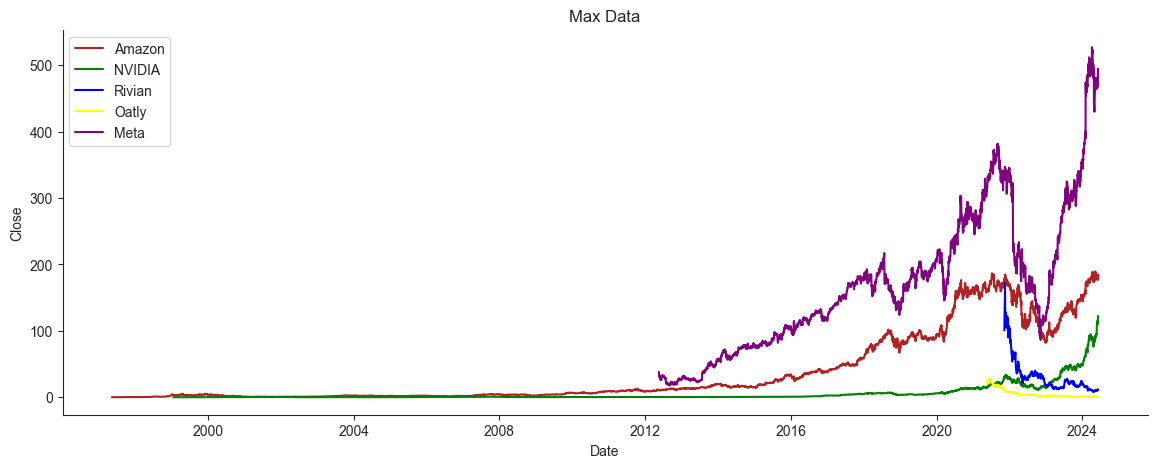

In [81]:
plt.figure(figsize = (14,5))
plt.title("Max Data")
sns.set_style("ticks")
sns.lineplot(data = amazon_history, x = "Date", y = "Close", color = "firebrick", label = "Amazon")
sns.lineplot(data = nvidia_history, x = "Date", y = "Close", color = "green", label = "NVIDIA")
sns.lineplot(data = rivian_history, x = "Date", y = "Close", color = "blue", label = "Rivian")
sns.lineplot(data = oatly_history, x = "Date", y = "Close", color = "yellow", label = "Oatly")
sns.lineplot(data = meta_history, x = "Date", y = "Close", color = "purple", label = "Meta")
sns.despine()

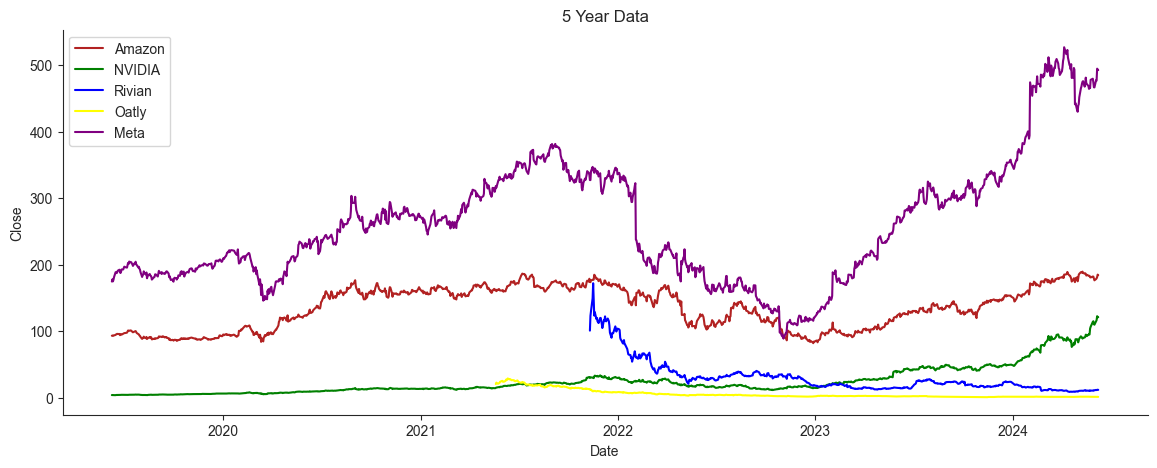

In [82]:
plt.figure(figsize = (14,5))
plt.title("5 Year Data")
sns.set_style("ticks")
sns.lineplot(data = amazon_history5y, x = "Date", y = "Close", color = "firebrick", label = "Amazon")
sns.lineplot(data = nvidia_history5y, x = "Date", y = "Close", color = "green", label = "NVIDIA")
sns.lineplot(data = rivian_history5y, x = "Date", y = "Close", color = "blue", label = "Rivian")
sns.lineplot(data = oatly_history5y, x = "Date", y = "Close", color = "yellow", label = "Oatly")
sns.lineplot(data = meta_history5y, x = "Date", y = "Close", color = "purple", label = "Meta")
sns.despine()

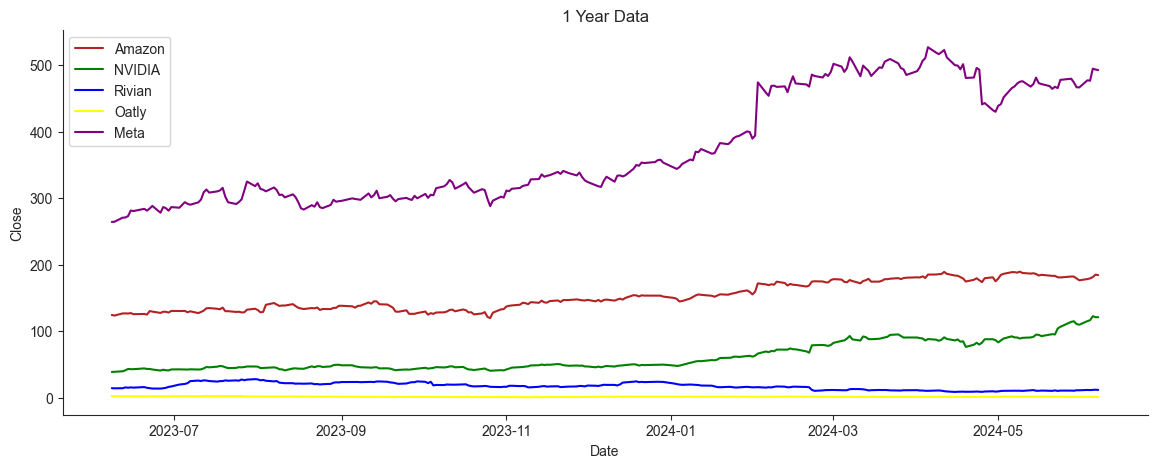

In [83]:
plt.figure(figsize = (14,5))
plt.title("1 Year Data")
sns.set_style("ticks")
sns.lineplot(data = amazon_history1y, x = "Date", y = "Close", color = "firebrick", label = "Amazon")
sns.lineplot(data = nvidia_history1y, x = "Date", y = "Close", color = "green", label = "NVIDIA")
sns.lineplot(data = rivian_history1y, x = "Date", y = "Close", color = "blue", label = "Rivian")
sns.lineplot(data = oatly_history1y, x = "Date", y = "Close", color = "yellow", label = "Oatly")
sns.lineplot(data = meta_history1y, x = "Date", y = "Close", color = "purple", label = "Meta")
sns.despine()

In [84]:
nvidia.recommendations
amazon.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,15,28,3,1,0
1,-1m,19,39,2,0,0
2,-2m,18,38,2,0,0
3,-3m,18,37,1,0,0


**Data Splitting**

In [85]:
nvidia_history5y["Open-Close"] = nvidia_history5y["Open"] - nvidia_history5y["Close"]
nvidia_history5y["Low-High"] = nvidia_history5y["Low"] - nvidia_history5y["High"]
nvidia_history5y["Target"] = np.where(nvidia_history5y["Close"].shift(-1) > nvidia_history5y["Close"], 1, 0)

nvidia_history5y = nvidia_history5y.reset_index()

#print(str(nvidia_history5y["Date"])[5])
#nvidia_history5y['EndQuarter'] = np.where(nvidia_history5y['Date']%3==0,1,0) 
#nvidia_history5y.head()

nvidia_history5y["Date"] = pd.to_datetime(nvidia_history5y["Date"])
nvidia_history5y["Month"] = nvidia_history5y["Date"].apply(lambda x: x.month)
nvidia_history5y["QuarterEnd"] = nvidia_history5y["Month"] % 3 == 0

nvidia_history5y.drop(columns=["Month"], inplace=True)
#nvidia_history5y["QuarterEnd"] = nvidia_history5y.dt.month % 3 == 0

In [89]:
features = nvidia_history5y[["Open-Close", "Low-High","QuarterEnd"]]
target = nvidia_history5y["Target"]
scaler = StandardScaler() 
features = scaler.fit_transform(features) 

X_train, X_valid, Y_train, Y_valid = train_test_split( 
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1133, 3) (126, 3)


In [91]:

models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5224535433070866
Validation Accuracy :  0.5096348884381339

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5384850393700787
Validation Accuracy :  0.4589249492900609

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

**Random Forest**

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
nvidia_history5y